<a href="https://colab.research.google.com/github/Leerith/Metodos.compartido/blob/main/4_Gauss3D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

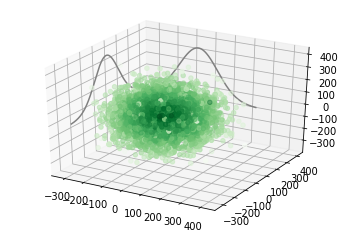

In [ ]:
#Este es el programa que usé para crear la imagen de una gaussiana de tres variables que hay en el ppt de termo
#Esto no lo haréis, es simplemente para que veais un ejemplo de lo que se puede hacer con otros paquetes

from mpl_toolkits import mplot3d

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats

#Este es un paquete para plotear un poco mas complicado, por lo que empezamos aquí dicendole lo que vamos a plotear
#Sinceramente, no sé exactamente como funciona todo en el paquete, pero os enseño lo que pueda
#No os rayéis, esto no lo veréis xd

fig = plt.figure()
ax = plt.axes(projection='3d')

N=5000
R=60

#Todo el bloque que viene ahora es para obtener las dos gaussianas proyectadas sobre las paredes
#No me molesté en generar datos aleatorios que siguieran una gaussiana para cada una, simplemente
#me definí una matriz de variables (gvar) que coge 5000 puntos del intervalo [-300,+300] y una
#matriz funcion (gfun) que guarda el valor de una gaussiana de media 0 y desviacion 100 para cada
#uno de esos puntos.

gvar=np.linspace(-300,300,N)
gfun=100000*scipy.stats.norm(0,100).pdf(gvar)

gzero=np.zeros(N)             #Todo esto de aquí es simplemente para colocar las curvas que queden bonitas
gzerox=[x+300 for x in gzero] #para que no esten en pleno medio de la imagen, las ploteo sobre las paredes,
gzeroy=[x-300 for x in gzero] #es decir sobre x=300 una y sobre y=-300 la otra.

ax.plot3D(gvar, gzerox, gfun, 'gray') #Y aquí le doy al programa las coordenadas de cada punto que tiene que pintar
ax.plot3D(gzeroy, gvar, gfun, 'gray') #(una es la variable, una es la función, y la otra lo desplazada que la he puesto para que no esté en medio)

#Y en este otro bloque viene lo bueno: me genero 5000 puntos aleatorios cuyas coordenadas siguen una normal
#de media 0 y desviacion 100 cada una, es decir una "gaussiana 3d"

xdata=np.random.normal(0,100,N)
ydata=np.random.normal(0,100,N)
zdata=np.random.normal(0,100,N)

#Aquí creo una matriz rdata que me da la distancia de cada punto al origen, más específicamente, me da 60-distancia
#La usaré para hace que los puntos mas lejanos al origen sean más transparentes, y dar esa sensacion de volumen
rdata=np.zeros(N)
for i in range(0,N-1):
  rdata[i]=R-np.sqrt(xdata[i]**2+ydata[i]**2+zdata[i]**2)

ax.scatter3D(xdata, ydata, zdata, c=rdata, cmap='Greens'); #Ploteo los puntos con las coordenadas aleatorias, usando la matriz rdata para la opacidad

#Los puntos aleatorios me los da python, técnicamente son pseudoaleatorios (siguen ciertas reglas), porque la generación de números completamente aleatorios
#es un reto computacional. Hay hardwares capaces de hacerlo, pero la mayor parte de ordenadores usan cosas "suficientemente aleatorias", como por ejemplo
#'la tercera cifra de la hora local en greenwich cuando le has dado a Ejecutar' o cosas así
#Si le dais a ejecutar varias veces, deberíais ver que el plot cambia un poco, porque los números aleatorios son nuevos.